In [1]:
#Importacion de librerias
import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression # Librería para Regresión Lineal
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
#Lectura de datos
Data = pd.read_csv('Titanic-Dataset.csv')
Data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
#Descripcion de los datos
Data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
Data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
#Revisión de datos faltantes

print("Cantidad de Registros con cero en Year: ",Data['Age'].isin([0]).sum())

Cantidad de Registros con cero en Year:  0


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

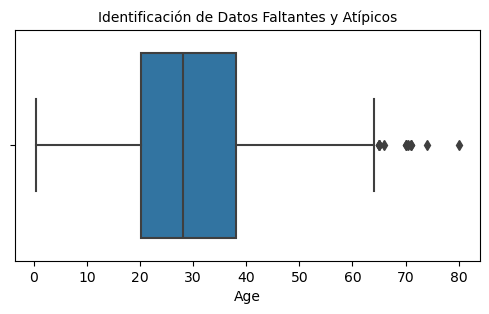

In [6]:
#Identificación de Datos Faltantes y Atípicos - Edad

plt.figure(figsize=(6, 3))
sns.boxplot(x=Data['Age'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

In [7]:
# Reemplazo de los valores nulos en Age por la media

Data['Age'].fillna(Data['Age'].mean(), inplace=True)

Data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

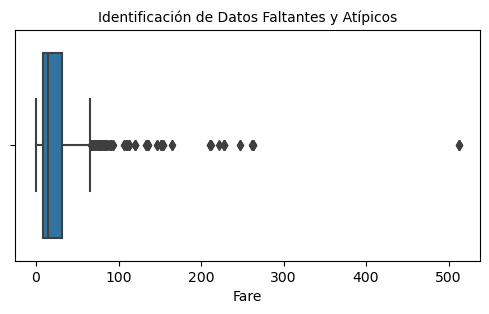

In [8]:
#Identificación de Datos Faltantes y Atípicos - Valor Tiquete

plt.figure(figsize=(6, 3))
sns.boxplot(x=Data['Fare'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

In [9]:
#Conteo de Datos Atípicos Precio

nivel_minimo=0
nivel_maximo=300
Total_Atipicos=((Data['Fare']<nivel_minimo)|(Data['Fare']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 3


In [10]:
# Filtra Datos Atípicos

Data=Data[(Data['Fare']<nivel_maximo)&(Data['Fare']>nivel_minimo)]

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

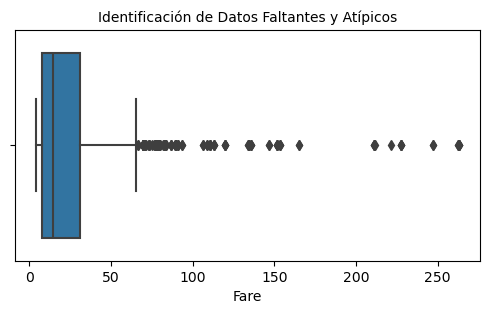

In [11]:
#Identificación de Datos Faltantes y Atípicos - Valor Tiquete

plt.figure(figsize=(6, 3))
sns.boxplot(x=Data['Fare'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

In [12]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 873 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  873 non-null    int64  
 1   Survived     873 non-null    int64  
 2   Pclass       873 non-null    int64  
 3   Name         873 non-null    object 
 4   Sex          873 non-null    object 
 5   Age          873 non-null    float64
 6   SibSp        873 non-null    int64  
 7   Parch        873 non-null    int64  
 8   Ticket       873 non-null    object 
 9   Fare         873 non-null    float64
 10  Cabin        199 non-null    object 
 11  Embarked     871 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 88.7+ KB


In [13]:
Data['Survived'].head(10)

0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: Survived, dtype: int64

In [14]:
Data['Age'] = Data['Age'].astype(int)

In [15]:
Data['Age'].head(10)

0    22
1    38
2    26
3    35
4    35
5    29
6    54
7     2
8    27
9    14
Name: Age, dtype: int32

In [16]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 873 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  873 non-null    int64  
 1   Survived     873 non-null    int64  
 2   Pclass       873 non-null    int64  
 3   Name         873 non-null    object 
 4   Sex          873 non-null    object 
 5   Age          873 non-null    int32  
 6   SibSp        873 non-null    int64  
 7   Parch        873 non-null    int64  
 8   Ticket       873 non-null    object 
 9   Fare         873 non-null    float64
 10  Cabin        199 non-null    object 
 11  Embarked     871 non-null    object 
dtypes: float64(1), int32(1), int64(5), object(5)
memory usage: 85.3+ KB


In [17]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = Data.drop('Survived',axis=1) # Se cargan los datos de train sin los datos de la columna sobreviviente 
Y = Data['Survived'] # Se cargan los datos de train con los datos de la la columna sobreviviente

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

print (X_train)

     PassengerId  Pclass                                    Name     Sex  Age  \
638          639       3  Panula, Mrs. Juha (Maria Emilia Ojala)  female   41   
176          177       3           Lefebre, Master. Henry Forbes    male   29   
625          626       1                   Sutton, Mr. Frederick    male   61   
731          732       3                Hassan, Mr. Houssein G N    male   11   
332          333       1               Graham, Mr. George Edward    male   38   
..           ...     ...                                     ...     ...  ...   
6              7       1                 McCarthy, Mr. Timothy J    male   54   
738          739       3                      Ivanoff, Mr. Kanio    male   29   
720          721       2       Harper, Miss. Annie Jessie "Nina"  female    6   
782          783       1                  Long, Mr. Milton Clyde    male   29   
376          377       3         Landergren, Miss. Aurora Adelia  female   22   

     SibSp  Parch    Ticket

In [18]:
print (X_train)

     PassengerId  Pclass                                    Name     Sex  Age  \
638          639       3  Panula, Mrs. Juha (Maria Emilia Ojala)  female   41   
176          177       3           Lefebre, Master. Henry Forbes    male   29   
625          626       1                   Sutton, Mr. Frederick    male   61   
731          732       3                Hassan, Mr. Houssein G N    male   11   
332          333       1               Graham, Mr. George Edward    male   38   
..           ...     ...                                     ...     ...  ...   
6              7       1                 McCarthy, Mr. Timothy J    male   54   
738          739       3                      Ivanoff, Mr. Kanio    male   29   
720          721       2       Harper, Miss. Annie Jessie "Nina"  female    6   
782          783       1                  Long, Mr. Milton Clyde    male   29   
376          377       3         Landergren, Miss. Aurora Adelia  female   22   

     SibSp  Parch    Ticket

In [19]:
print(Y_train)

638    0
176    0
625    0
731    0
332    0
      ..
6      0
738    0
720    1
782    0
376    1
Name: Survived, Length: 654, dtype: int64


In [20]:
X_train = X_train.select_dtypes(include=['number'])
print(X_train)

     PassengerId  Pclass  Age  SibSp  Parch      Fare
638          639       3   41      0      5   39.6875
176          177       3   29      3      1   25.4667
625          626       1   61      0      0   32.3208
731          732       3   11      0      0   18.7875
332          333       1   38      0      1  153.4625
..           ...     ...  ...    ...    ...       ...
6              7       1   54      0      0   51.8625
738          739       3   29      0      0    7.8958
720          721       2    6      0      1   33.0000
782          783       1   29      0      0   30.0000
376          377       3   22      0      0    7.2500

[654 rows x 6 columns]


In [21]:
X_test = X_test.select_dtypes(include=['number'])
print(X_test)

     PassengerId  Pclass  Age  SibSp  Parch      Fare
172          173       3    1      1      1   11.1333
665          666       2   32      2      0   73.5000
234          235       2   24      0      0   10.5000
741          742       1   36      1      0   78.8500
345          346       2   24      0      0   13.0000
..           ...     ...  ...    ...    ...       ...
752          753       3   33      0      0    9.5000
215          216       1   31      1      0  113.2750
569          570       3   32      0      0    7.8542
491          492       3   21      0      0    7.2500
201          202       3   29      8      2   69.5500

[219 rows x 6 columns]


In [22]:
# Construir el modelo de regresión lineal 

model = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
  
model.fit(X_train, Y_train)

Prediccion = model.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación


In [23]:
print (Y_test)

172    1
665    0
234    0
741    0
345    1
      ..
752    0
215    1
569    1
491    0
201    0
Name: Survived, Length: 219, dtype: int64


In [24]:
print (Prediccion)

[0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0
 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 0 1 0
 1 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0]


In [25]:
# Desempeño del modelo de regresión

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.69      0.83      0.76       134
           1       0.61      0.42      0.50        85

    accuracy                           0.67       219
   macro avg       0.65      0.63      0.63       219
weighted avg       0.66      0.67      0.66       219



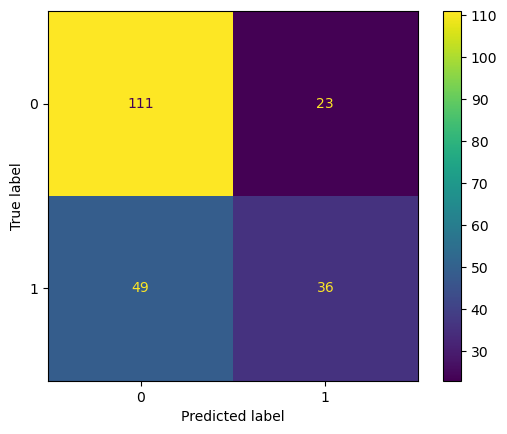

In [26]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

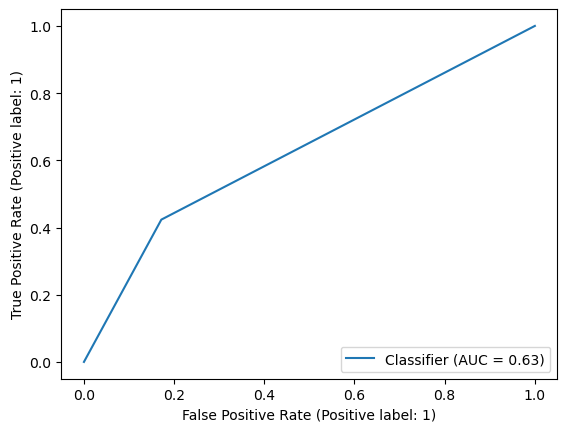

In [27]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()